# Group 8 HW2_AD_classify

|  系所   | 年級  |  姓名   | 學號  |工作分配  |
|  :----:  | :----:  | :----:  | :----: |:----:  |
| 不分系  | 大四 | 盧柏翰  | F14081088 |資料前處理 & AD_classify 程式撰寫 |
| 醫工所  | 碩一 | 朱俊憲  | P86114165 |AD_mmse 程式撰寫 |
| 醫工系  | 大四 | 徐嘉駿  | F94099011 | 報告撰寫（併入 ipynb） |


In [ ]:
import numpy as np
import pandas as pd

# Load the datasets

- Save and upload .xlsx as .csv manually, biz the file's index is fault
- Load the google drive directory

In [ ]:
control_dir = '/content/drive/MyDrive/Colab Notebooks/NLP_HW2/train/control'
patient_dir = '/content/drive/MyDrive/Colab Notebooks/NLP_HW2/train/patient'

Use panda to read the .csv file

In [ ]:
train_cc_eval = pd.read_csv(control_dir + '/train.cc.eval.csv')
print(train_cc_eval.shape)
train_cc_eval.head(5)

(54, 40)


,File,Language,Corpus,Code,Group,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,S001.cha,eng,Pitt,PAR,Control,83,13,13,12.923,15.769,...,4.571,1.143,16.571,6.857,1.321,0.851,80,94,4,1
1,S002.cha,eng,Pitt,PAR,Control,49,13,13,6.615,8.462,...,7.368,0.000,16.842,3.158,1.412,1.136,50,44,0,0
2,S003.cha,eng,Pitt,PAR,Control,48,13,13,8.154,10.000,...,2.655,0.000,15.929,10.619,1.316,0.915,54,59,3,0
3,S004.cha,eng,Pitt,PAR,Control,73,23,23,8.609,10.261,...,8.411,1.869,12.150,10.280,1.077,0.981,104,106,3,4
4,S005.cha,eng,Pitt,PAR,Control,75,11,11,15.273,18.455,...,6.742,2.247,13.483,10.674,0.969,0.892,83,93,6,0


In [ ]:
train_cd_eval = pd.read_csv(patient_dir + '/train.cd.eval.csv')
print(train_cd_eval.shape)
train_cd_eval.head(5)

(999, 40)


,File,Language,Corpus,Code,Group,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,S079.cha,eng,Pitt,PAR,ProbableAD,68.0,13.0,13.0,8.308,9.769,...,6.723,0.840,12.605,15.126,0.783,0.812,52.0,64.0,7.0,7.0
1,S080.cha,eng,Pitt,PAR,ProbableAD,13.0,3.0,3.0,5.333,7.000,...,5.263,0.000,15.789,15.789,1.333,0.800,8.0,10.0,0.0,1.0
2,S081.cha,eng,Pitt,PAR,ProbableAD,53.0,15.0,15.0,9.133,11.333,...,1.974,0.658,17.105,9.868,1.545,0.776,66.0,85.0,4.0,2.0
3,S082.cha,eng,Pitt,PAR,ProbableAD,107.0,11.0,10.0,9.500,11.000,...,7.619,1.905,15.238,12.381,1.133,0.651,41.0,63.0,3.0,12.0
4,S083.cha,eng,Pitt,PAR,ProbableAD,58.0,7.0,7.0,10.286,12.143,...,4.110,0.000,12.329,9.589,1.000,0.895,34.0,38.0,2.0,1.0


# Preprocessing

Drop the cols we don't need

- 'File' just the index of data, which doesn't influence the AD judgement
- 'Language' is 'English' for all data
- 'Corpus' is 'Pitt' for all data
- 'Code' is 'PAR' for all data

In [ ]:
train_cc_eval = train_cc_eval.drop(['File','Language','Corpus','Code'], axis=1)
print(train_cc_eval.shape)
train_cc_eval.head(5)

(54, 36)


,Group,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,Control,83,13,13,12.923,15.769,81,175,0.463,126.506,...,4.571,1.143,16.571,6.857,1.321,0.851,80,94,4,1
1,Control,49,13,13,6.615,8.462,54,95,0.568,116.327,...,7.368,0.000,16.842,3.158,1.412,1.136,50,44,0,0
2,Control,48,13,13,8.154,10.000,59,113,0.522,141.250,...,2.655,0.000,15.929,10.619,1.316,0.915,54,59,3,0
3,Control,73,23,23,8.609,10.261,94,214,0.439,175.890,...,8.411,1.869,12.150,10.280,1.077,0.981,104,106,3,4
4,Control,75,11,11,15.273,18.455,88,178,0.494,142.400,...,6.742,2.247,13.483,10.674,0.969,0.892,83,93,6,0


In [ ]:
train_cd_eval = train_cd_eval.drop(['File','Language','Corpus','Code'], axis=1)
print(train_cd_eval.shape)
train_cd_eval.head(5)

(999, 36)


,Group,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,ProbableAD,68.0,13.0,13.0,8.308,9.769,59.0,119.0,0.496,105.000,...,6.723,0.840,12.605,15.126,0.783,0.812,52.0,64.0,7.0,7.0
1,ProbableAD,13.0,3.0,3.0,5.333,7.000,14.0,19.0,0.737,87.692,...,5.263,0.000,15.789,15.789,1.333,0.800,8.0,10.0,0.0,1.0
2,ProbableAD,53.0,15.0,15.0,9.133,11.333,61.0,152.0,0.401,172.075,...,1.974,0.658,17.105,9.868,1.545,0.776,66.0,85.0,4.0,2.0
3,ProbableAD,107.0,11.0,10.0,9.500,11.000,55.0,105.0,0.524,58.879,...,7.619,1.905,15.238,12.381,1.133,0.651,41.0,63.0,3.0,12.0
4,ProbableAD,58.0,7.0,7.0,10.286,12.143,44.0,73.0,0.603,75.517,...,4.110,0.000,12.329,9.589,1.000,0.895,34.0,38.0,2.0,1.0


Deal with the NaN (drop out)

In [ ]:
train_cc_eval = train_cc_eval.dropna(axis=0)
print(train_cc_eval.shape)
train_cc_eval.head(5)

(54, 36)


,Group,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,Control,83,13,13,12.923,15.769,81,175,0.463,126.506,...,4.571,1.143,16.571,6.857,1.321,0.851,80,94,4,1
1,Control,49,13,13,6.615,8.462,54,95,0.568,116.327,...,7.368,0.000,16.842,3.158,1.412,1.136,50,44,0,0
2,Control,48,13,13,8.154,10.000,59,113,0.522,141.250,...,2.655,0.000,15.929,10.619,1.316,0.915,54,59,3,0
3,Control,73,23,23,8.609,10.261,94,214,0.439,175.890,...,8.411,1.869,12.150,10.280,1.077,0.981,104,106,3,4
4,Control,75,11,11,15.273,18.455,88,178,0.494,142.400,...,6.742,2.247,13.483,10.674,0.969,0.892,83,93,6,0


In [ ]:
train_cd_eval = train_cd_eval.dropna(axis=0)
print(train_cd_eval.shape)
train_cd_eval.head(5)

(54, 36)


,Group,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,ProbableAD,68.0,13.0,13.0,8.308,9.769,59.0,119.0,0.496,105.000,...,6.723,0.840,12.605,15.126,0.783,0.812,52.0,64.0,7.0,7.0
1,ProbableAD,13.0,3.0,3.0,5.333,7.000,14.0,19.0,0.737,87.692,...,5.263,0.000,15.789,15.789,1.333,0.800,8.0,10.0,0.0,1.0
2,ProbableAD,53.0,15.0,15.0,9.133,11.333,61.0,152.0,0.401,172.075,...,1.974,0.658,17.105,9.868,1.545,0.776,66.0,85.0,4.0,2.0
3,ProbableAD,107.0,11.0,10.0,9.500,11.000,55.0,105.0,0.524,58.879,...,7.619,1.905,15.238,12.381,1.133,0.651,41.0,63.0,3.0,12.0
4,ProbableAD,58.0,7.0,7.0,10.286,12.143,44.0,73.0,0.603,75.517,...,4.110,0.000,12.329,9.589,1.000,0.895,34.0,38.0,2.0,1.0


## Deal with the label "Group"


*   Turning the string into integer





In [ ]:
for index in range(len(train_cc_eval)): 

  label = train_cc_eval['Group'][index]

  if (label == 'Control'):
    train_cc_eval['Group'][index] = 0
  else:
    train_cc_eval['Group'][index] = 1

# 0 for Control (without AD)

from IPython.display import clear_output 
clear_output()

In [ ]:
train_cc_eval.head(5)

,Group,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,0,83,13,13,12.923,15.769,81,175,0.463,126.506,...,4.571,1.143,16.571,6.857,1.321,0.851,80,94,4,1
1,0,49,13,13,6.615,8.462,54,95,0.568,116.327,...,7.368,0.000,16.842,3.158,1.412,1.136,50,44,0,0
2,0,48,13,13,8.154,10.000,59,113,0.522,141.250,...,2.655,0.000,15.929,10.619,1.316,0.915,54,59,3,0
3,0,73,23,23,8.609,10.261,94,214,0.439,175.890,...,8.411,1.869,12.150,10.280,1.077,0.981,104,106,3,4
4,0,75,11,11,15.273,18.455,88,178,0.494,142.400,...,6.742,2.247,13.483,10.674,0.969,0.892,83,93,6,0


In [ ]:
for index in range(len(train_cd_eval)): 

  label = train_cd_eval['Group'][index]

  if (label == 'Control'):
    train_cd_eval['Group'][index] = 0
  else:
    train_cd_eval['Group'][index] = 1

# 1 for ProbableAD

from IPython.display import clear_output 
clear_output()

In [ ]:
train_cd_eval.head(5)

,Group,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,1,68.0,13.0,13.0,8.308,9.769,59.0,119.0,0.496,105.000,...,6.723,0.840,12.605,15.126,0.783,0.812,52.0,64.0,7.0,7.0
1,1,13.0,3.0,3.0,5.333,7.000,14.0,19.0,0.737,87.692,...,5.263,0.000,15.789,15.789,1.333,0.800,8.0,10.0,0.0,1.0
2,1,53.0,15.0,15.0,9.133,11.333,61.0,152.0,0.401,172.075,...,1.974,0.658,17.105,9.868,1.545,0.776,66.0,85.0,4.0,2.0
3,1,107.0,11.0,10.0,9.500,11.000,55.0,105.0,0.524,58.879,...,7.619,1.905,15.238,12.381,1.133,0.651,41.0,63.0,3.0,12.0
4,1,58.0,7.0,7.0,10.286,12.143,44.0,73.0,0.603,75.517,...,4.110,0.000,12.329,9.589,1.000,0.895,34.0,38.0,2.0,1.0


## Concatenate the Control and ProbableAD data together

In [ ]:
train_data = pd.concat([train_cc_eval, train_cd_eval], axis=0)
print(train_data.shape)
train_data.head(5)

(108, 36)


,Group,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,0,83.0,13.0,13.0,12.923,15.769,81.0,175.0,0.463,126.506,...,4.571,1.143,16.571,6.857,1.321,0.851,80.0,94.0,4.0,1.0
1,0,49.0,13.0,13.0,6.615,8.462,54.0,95.0,0.568,116.327,...,7.368,0.000,16.842,3.158,1.412,1.136,50.0,44.0,0.0,0.0
2,0,48.0,13.0,13.0,8.154,10.000,59.0,113.0,0.522,141.250,...,2.655,0.000,15.929,10.619,1.316,0.915,54.0,59.0,3.0,0.0
3,0,73.0,23.0,23.0,8.609,10.261,94.0,214.0,0.439,175.890,...,8.411,1.869,12.150,10.280,1.077,0.981,104.0,106.0,3.0,4.0
4,0,75.0,11.0,11.0,15.273,18.455,88.0,178.0,0.494,142.400,...,6.742,2.247,13.483,10.674,0.969,0.892,83.0,93.0,6.0,0.0


## Spilt the dataset into X and y (label)

In [ ]:
y = train_data['Group']
print(y.shape)
print(type(y))

(108,)
<class 'pandas.core.series.Series'>


In [ ]:
X = train_data.drop(['Group'], axis=1)
print(X.shape)
print(type(X))

(108, 35)
<class 'pandas.core.frame.DataFrame'>


## Draw the heapmap of correlation of each cols

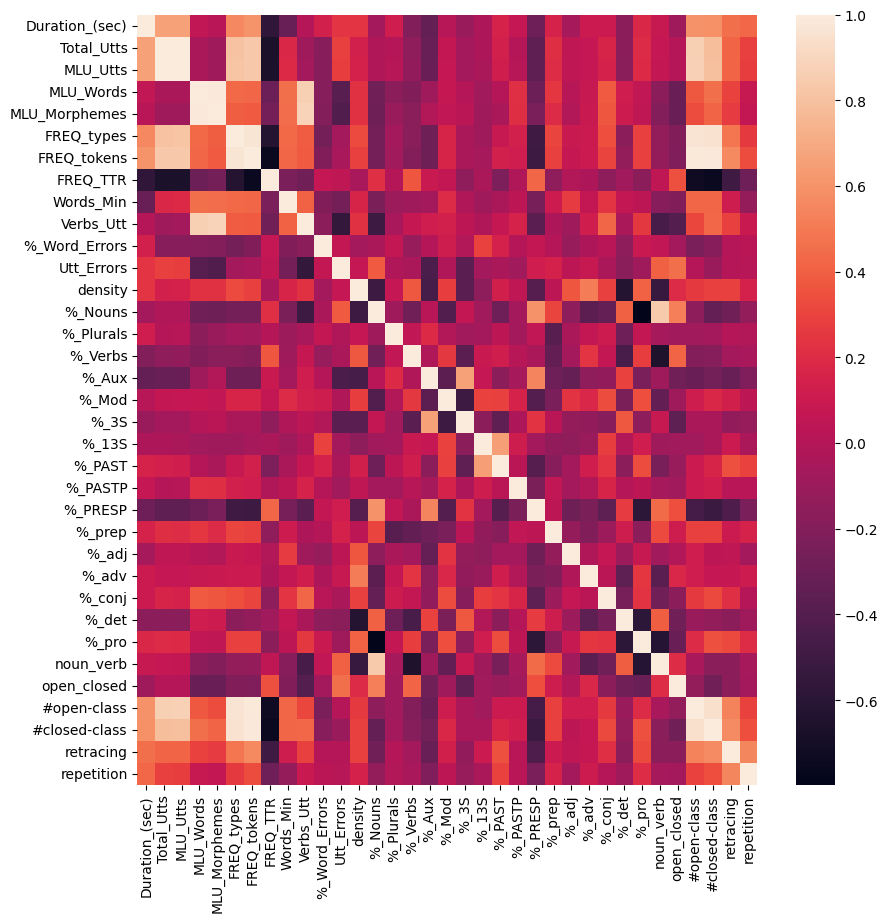

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = X.corr()

# plot the heatmap

plt.figure(figsize=(10, 10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

# Feature selection

## Filter method



- We will normalize the data firstly
- Use RandomForestClassifier to be the baseline model
- Following function will return the 'acc', 'roc', 'precision', and the number of feature

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import precision_score
from sklearn.model_selection import learning_curve

In [ ]:
def training(X, y):

  X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.33 ,stratify=y)

  # 標準化
  scaler = StandardScaler().fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  
  # RandomForestClassifier
  model = RandomForestClassifier(criterion='entropy', random_state=9527)
  model.fit(X_train_scaled, y_train)

  return model, X_train, X_test_scaled, y_train, y_test

In [ ]:
def plot_learning_curve(model, X_train, y_train):

    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=3, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))


    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)


    plt.subplots(1, figsize=(6,6))
    plt.plot(train_sizes, train_mean, color="#7FC29B",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#817E9F", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.savefig('AD_classify_learning_curve.png')
    plt.show()

    from google.colab import files
    files.download('AD_classify_learning_curve.png')

    return

In [ ]:
def RFC(X,y):

    feature_count = len(X.columns)
    y = y.astype('int')

    # RandomForestClassifier
    model, X_train, X_test_scaled, y_train, y_test = training(X, y)

    # plot learning curve
    plot_learning_curve(model, X_train, y_train)

    # 預測
    y_pred = model.predict(X_test_scaled)

    return {
        'accuracy' : accuracy_score(y_test, y_pred),
        'roc' : roc_auc_score(y_test, y_pred),
        'precision' : precision_score(y_test, y_pred),
        'Feature Count' : feature_count
    }

In [ ]:
RFC(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 48 instead of 50.
  warnings.warn(


KeyboardInterrupt: ignored

# Using filter method

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# 設定半常數特徵的的門檻
threshold = 0.7

quasi_constant_feature = []

for feature in X.columns:

    # 計算比率
    predominant = (X[feature].value_counts() /
    np.float(len(X))).sort_values(ascending=False).values[0]
    
    # 假如大於門檻 加入 list
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   

# 移除半常數特徵
X.drop(labels=quasi_constant_feature, axis=1, inplace=True)

from IPython.display import clear_output 
clear_output()

print(quasi_constant_feature)
print(len(X.columns))

['%_13S']
34


## Draw the heatmap of X_drop (X after filter) to show the correlation

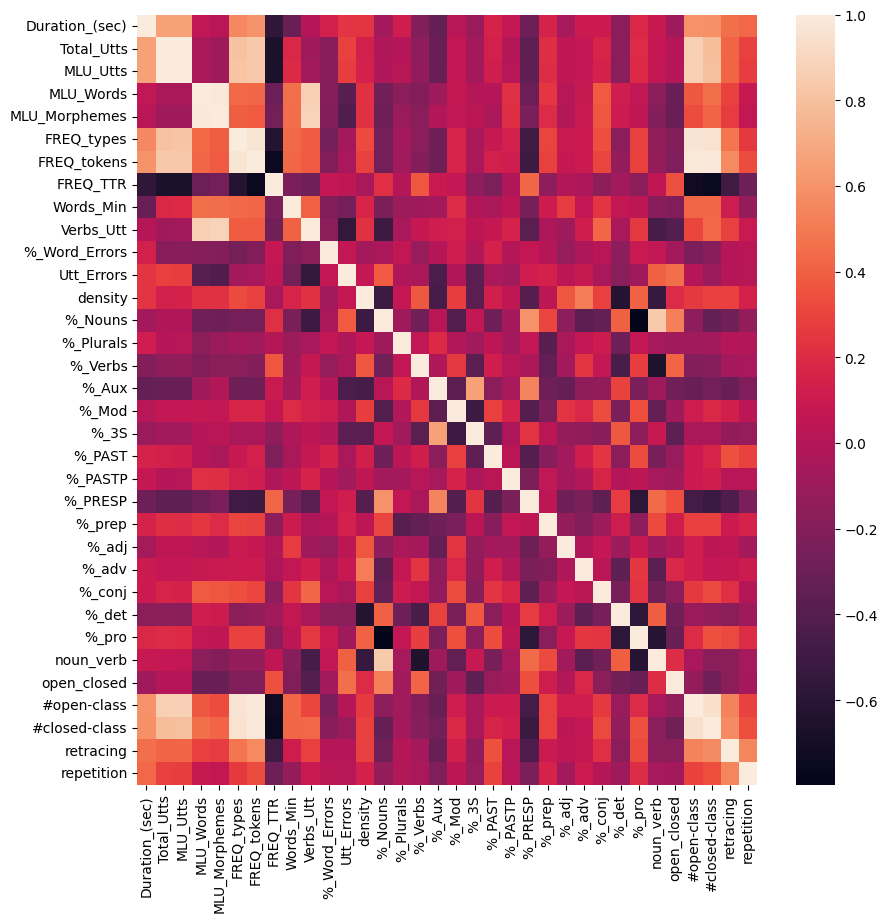

In [ ]:
# calculate the correlation matrix
corr = X.corr()

# plot the heatmap

plt.figure(figsize=(10, 10))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 48 instead of 50.
  warnings.warn(


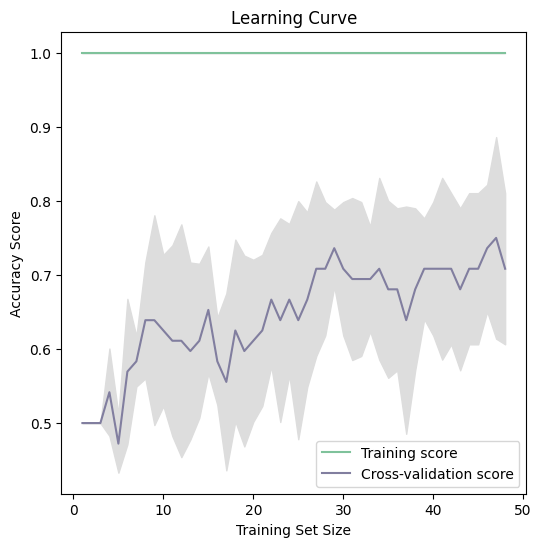

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'accuracy': 0.7222222222222222,
 'roc': 0.7222222222222222,
 'precision': 0.7222222222222222,
 'Feature Count': 34}

In [ ]:
RFC(X,y)

# Load the testing file

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP_HW2/test/test.eval.re.csv')

## Turn the testing file into test_X 

- In order to use our model to test

In [ ]:
test_X = test.drop(['File','Language','Corpus','Code', 'Group'], axis=1)
test_X.head(5)

,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,FREQ_types,FREQ_tokens,FREQ_TTR,Words_Min,Verbs_Utt,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,34,6,6,8.667,10.333,34,55,0.618,97.059,1.500,...,3.636,1.818,18.182,1.818,1.444,1.120,28,25,0,0
1,62,12,12,13.833,15.917,75,172,0.436,166.452,1.833,...,3.488,2.326,16.860,7.558,1.955,0.789,75,95,3,0
2,55,8,8,9.000,11.000,48,80,0.600,87.273,1.375,...,5.000,0.000,15.000,12.500,1.500,0.778,35,45,1,0
3,36,8,7,4.143,5.429,30,35,0.857,58.333,0.125,...,2.857,0.000,11.429,0.000,2.333,1.692,22,13,0,0
4,45,8,8,10.000,12.375,51,87,0.586,116.000,1.750,...,3.448,1.149,14.943,11.494,1.188,0.826,38,46,1,3


## Predict the test_X

In [ ]:
# 設定半常數特徵的的門檻
threshold = 0.7

quasi_constant_feature = []

for feature in test_X.columns:

    # 計算比率
    predominant = (test_X[feature].value_counts() /
    np.float(len(test_X))).sort_values(ascending=False).values[0]
    
    # 假如大於門檻 加入 list
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   

# 移除半常數特徵
test_X.drop(labels=quasi_constant_feature, axis=1, inplace=True)

from IPython.display import clear_output 
clear_output()

In [ ]:
model, X_train, X_test_scaled, y_train, y_test = training(X, y)

pred_Y = model.predict(test_X)
print(pred_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: ignored

## Turn the int to string

In [ ]:
result = []

for index, value in enumerate(pred_Y):
    if value == 0:
      result.append('Control')
    else:
      result.append('ProbableAD')


print(result)

['Control', 'Control', 'ProbableAD', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'Control', 'ProbableAD', 'ProbableAD', 'Control', 'ProbableAD', 'ProbableAD', 'ProbableAD', 'Control', 'Control', 'Control', 'Control', 'ProbableAD', 'Control', 'ProbableAD', 'Control', 'Control', 'Control', 'ProbableAD', 'ProbableAD', 'ProbableAD', 'Control', 'Control', 'ProbableAD', 'ProbableAD', 'ProbableAD', 'Control', 'Control', 'ProbableAD', 'Control', 'Control']


## Turn the list to df

In [ ]:
result2 = pd.DataFrame(result, columns=['Group'])

## Combine the pred_Y to test_X

In [ ]:
test['Group'] = result2['Group']
test.head(5)

,File,Language,Corpus,Code,Group,Duration_(sec),Total_Utts,MLU_Utts,MLU_Words,MLU_Morphemes,...,%_adv,%_conj,%_det,%_pro,noun_verb,open_closed,#open-class,#closed-class,retracing,repetition
0,1,eng,Pitt,PAR,Control,34,6,6,8.667,10.333,...,3.636,1.818,18.182,1.818,1.444,1.120,28,25,0,0
1,2,eng,Pitt,PAR,Control,62,12,12,13.833,15.917,...,3.488,2.326,16.860,7.558,1.955,0.789,75,95,3,0
2,3,eng,Pitt,PAR,ProbableAD,55,8,8,9.000,11.000,...,5.000,0.000,15.000,12.500,1.500,0.778,35,45,1,0
3,4,eng,Pitt,PAR,Control,36,8,7,4.143,5.429,...,2.857,0.000,11.429,0.000,2.333,1.692,22,13,0,0
4,5,eng,Pitt,PAR,Control,45,8,8,10.000,12.375,...,3.448,1.149,14.943,11.494,1.188,0.826,38,46,1,3


## Turn the df to .xlsx and download

In [ ]:
test.to_excel(r'AD_classify.xlsx', index = False)

from google.colab import files
files.download('AD_classify.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>